<a href="https://colab.research.google.com/github/PradeepGundlapalli/Machine-Learning--AI/blob/main/add_labels_on_the_image_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy opencv-python Keras simplejson


1/1 [==============================] - 1s 1s/step


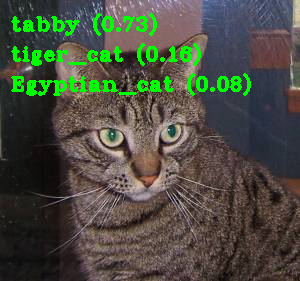

In [58]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
def load_and_predict(image_path):
    # Load the ResNet50 model pre-trained on ImageNet data
    model = ResNet50(weights='imagenet')

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Decode predictions
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    # Display the image with labels
    img_with_labels = cv2.imread(image_path)
    img_with_labels = cv2.cvtColor(img_with_labels, cv2.COLOR_BGR2RGB)

    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        # Draw label on the image
        label_text = f"{label} ({score:.2f})"
        cv2.putText(img_with_labels, label_text, (10, 30 + i * 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2)

    # Display the labeled image
    cv2_imshow(cv2.cvtColor(img_with_labels, cv2.COLOR_RGB2BGR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = '/content/1.jpg'
load_and_predict(image_path)
